## Null Space: PGDM 
We wrote a simple Python simulation to **visually demonstrate the Central Limit Theorem**.  

What is CLT?

*Say you have a population and want to estimate its mean. Since observing the entire population is often impractical, we draw random samples and compute their means. The Central Limit Theorem states that as the sample size increases, the distribution of the means collected from repeated samples converges to a normal distribution, regardless of the population’s original distribution (assuming finite mean and variance).*

## Step 1: We will demonstrate with stock returns


In [3]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
ticker = "RELIANCE.NS" #you can choose your favourite stock 
df = yf.download(ticker, start = '2016-01-01')['Close'] #we are taking the close amount only
df 

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Ticker,RELIANCE.NS
Date,
2016-01-01,220.010025
2016-01-04,215.665512
2016-01-05,217.799835
2016-01-06,223.661148
2016-01-07,219.555008
...,...
2026-01-08,1470.599976
2026-01-09,1475.300049
2026-01-12,1483.199951


In [5]:
df.columns

Index(['RELIANCE.NS'], dtype='object', name='Ticker')

### Log Return Formula
In financial analysis, we use returns for all statistical purpose since it is stationary and raw prices aren't stationary. 


$$
r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)
$$


In [6]:
df['Returns'] = np.log(df['RELIANCE.NS']/df['RELIANCE.NS'].shift(1))
df

Ticker,RELIANCE.NS,Returns
Date,,
2016-01-01,220.010025,NaN
2016-01-04,215.665512,-0.019944
2016-01-05,217.799835,0.009848
2016-01-06,223.661148,0.026556
2016-01-07,219.555008,-0.018529
...,...,...
2026-01-08,1470.599976,-0.022591
2026-01-09,1475.300049,0.003191
2026-01-12,1483.199951,0.005340


In [7]:
df = df.dropna() #since we don't have the perious value of that date we drop
df

Ticker,RELIANCE.NS,Returns
Date,,
2016-01-04,215.665512,-0.019944
2016-01-05,217.799835,0.009848
2016-01-06,223.661148,0.026556
2016-01-07,219.555008,-0.018529
2016-01-08,222.263550,0.012261
...,...,...
2026-01-08,1470.599976,-0.022591
2026-01-09,1475.300049,0.003191
2026-01-12,1483.199951,0.005340


In [8]:
returns = df['Returns'].values

In [9]:
returns #we are just storing it separately in an array for fast calculations

array([-0.01994446,  0.0098478 ,  0.02655572, ...,  0.00534049,
       -0.02070912,  0.00412145])

## Step 2: Visualization

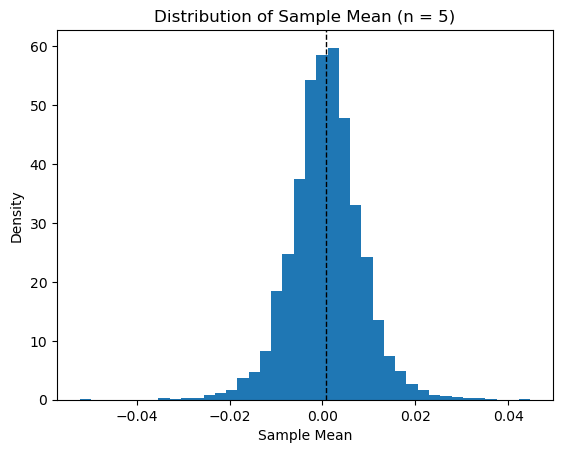

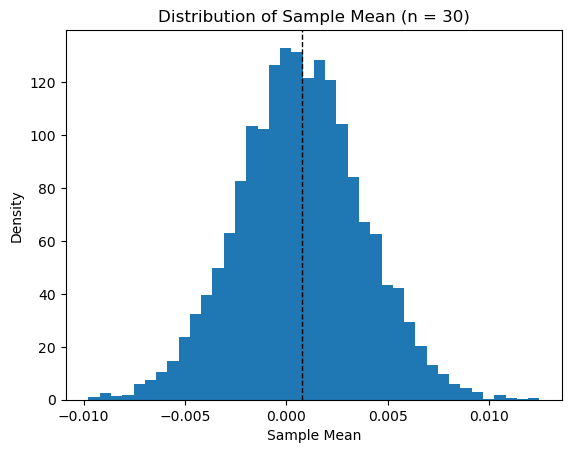

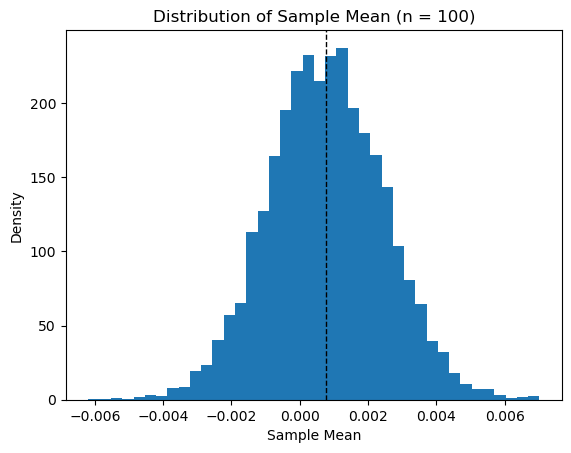

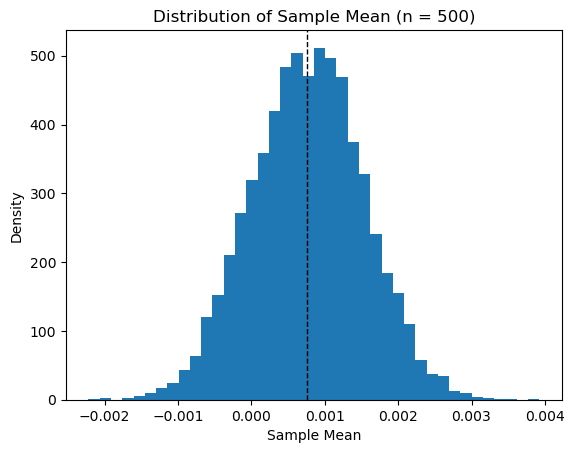

In [20]:
sample_sizes = [5, 30, 100, 500]
repitation = 5000

pop_mean  = returns.mean()
#now we write a function to iterate the samples
for n in sample_sizes:
    samples = np.random.choice(returns, size=(repitation, n), replace = True)
    sample_means = samples.mean(axis = 1) #for each sample size there is 5000 reps and we are taking the mean of a sample to check for normal distribution
    
    plt.hist(sample_means, bins=40, density=True)
    plt.axvline(pop_mean, color='black', linestyle='--', linewidth=1)
    plt.title(f"Distribution of Sample Mean (n = {n})")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
    plt.show()

#this should be in the sample block to check for the multiple sample size

In [11]:
#an example of how this function works, see the output as a matrix.
r = [1, 2, 3]
s = np.random.choice(r, size=(3, 4), replace=True) #here the r is the returns that we have to sample and size(3 is how many times should i sample and 
print(s) #4 is how many should i take from the returns

[[3 3 2 1]
 [2 2 3 2]
 [3 2 3 1]]


In [19]:
sample_means.size

5000

*Now what we want to compare ?*
- We now reduce the iteration to 5 or 10 and check for the visualization

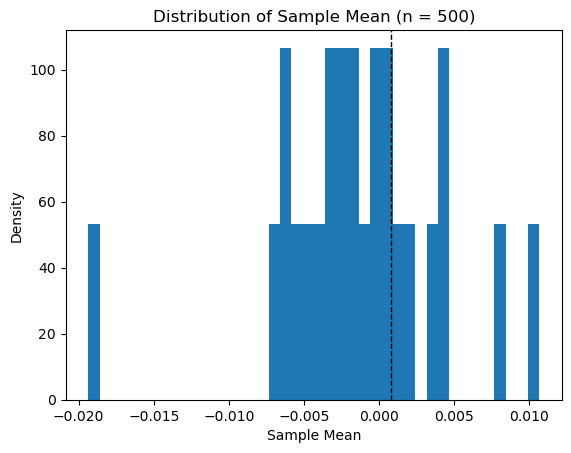

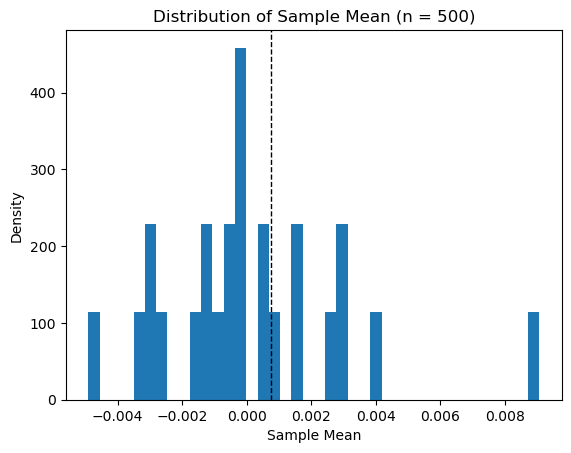

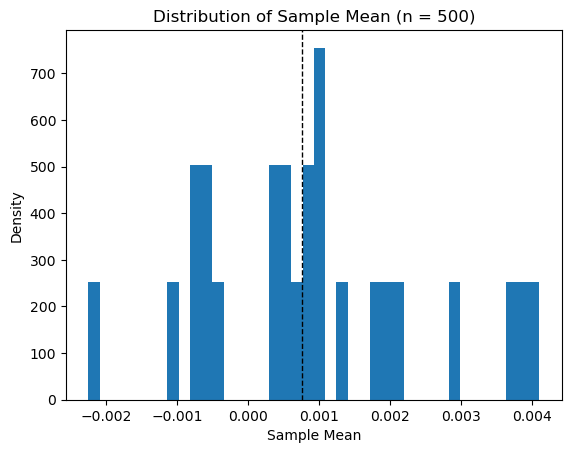

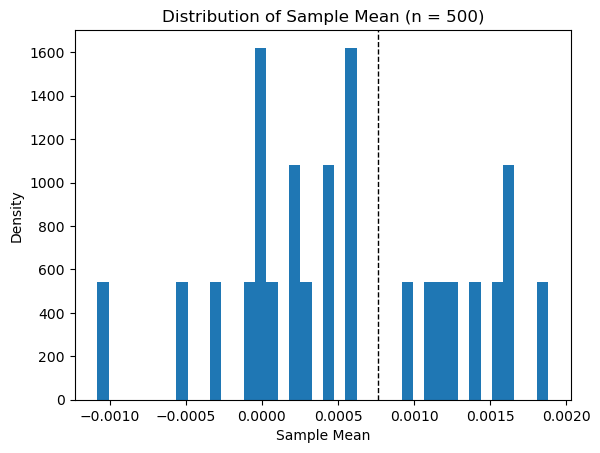

In [25]:
s_size = [5, 30, 100, 500]
rep = 25

p_mean  = returns.mean()

for i in s_size:
    s = np.random.choice(returns, size=(rep, i), replace = True)
    s_means = s.mean(axis = 1) 
    
    plt.hist(s_means, bins=40, density=True)
    plt.axvline(p_mean, color='black', linestyle='--', linewidth=1)
    plt.title(f"Distribution of Sample Mean (n = {n})")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
    plt.show()

#this should be in the sample block to check for the multiple sample size

**This illustrates the beauty of the Central Limit Theorem as the number of repeated samples increases, the distribution of sample means concentrates around the population mean.**